# finding p_c of directed percolation

100%|████████████████████████████████████████| 40/40 [3:53:58<00:00, 350.97s/it]

[[0.840775   0.75470417 0.695925   ... 0.         0.         0.        ]
 [0.85566667 0.77855833 0.7274625  ... 0.         0.         0.        ]
 [0.86175    0.79067083 0.74343333 ... 0.         0.         0.        ]
 [0.87374167 0.8102875  0.76675833 ... 0.22828333 0.22881667 0.22875833]
 [0.89829167 0.8479375  0.817475   ... 0.68222083 0.68259167 0.682625  ]]


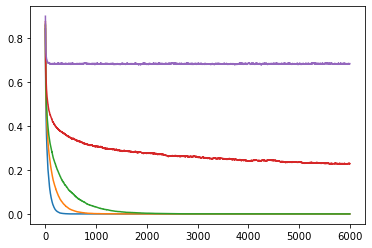

In [23]:
from pylab import *
from scipy.ndimage import measurements
import numpy as np
import matplotlib.pyplot as plt
import copy
from tqdm import tqdm
rho_sim=[]
for sim in tqdm(range(40)):
        L=6000
        lattice_o = np.zeros((L,L), dtype=int)
        lattice_o[0,0:L]=np.random.choice([0, 1], size=(L), p=[0,1])

        pv = [0.6,0.62,0.63,0.644701,0.68]
        sum_list=[]
        rho=[]
        for k in range(len(pv)):
            lattice=copy.copy(lattice_o)
            p = pv[k] 
            q=p*(2-p)

            for j in range(1,L):
                for i in range(L):
                    if ((i!=L-1) and (i!=0)):
                        z=np.random.rand(1)[0]
                        if lattice[j-1,i-1]==1 and lattice[j-1,i+1]==1 :
                             if z<q:
                                    lattice[j,i]= 1
                        elif lattice[j-1,i-1]!=lattice[j-1,i+1]:
                             if z<p:
                                    lattice[j,i]= 1
                    
                sum_list.append((sum(lattice[j,:]))/(L))

            rho.append(sum_list)
            sum_list=[]
        rho_sim.append(rho)
        
a = np.mean(np.array(rho_sim),axis=0)
print(a)
plt.plot(a[0])
plt.plot(a[1])
plt.plot(a[2])
plt.plot(a[3])
plt.plot(a[4])
        

            

In [26]:
with open("direct_p_c_0.txt", 'w') as output:
    for row in a[0]:
        output.write(str(row) + '\n')
with open("direct_p_c_1.txt", 'w') as output:
    for row in a[1]:
        output.write(str(row) + '\n')
with open("direct_p_c_2.txt", 'w') as output:
    for row in a[2]:
        output.write(str(row) + '\n')
with open("direct_p_c_3.txt", 'w') as output:
    for row in a[3]:
        output.write(str(row) + '\n')
with open("direct_p_c_4.txt", 'w') as output:
    for row in a[4]:
        output.write(str(row) + '\n')

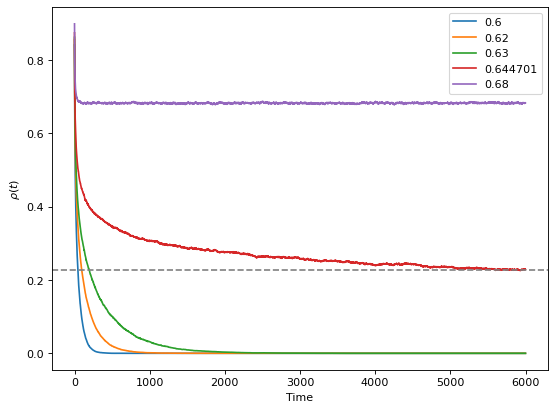

In [29]:
figure(figsize=(8, 6), dpi=80)
plt.plot(a[0],label=pv[0])
plt.plot(a[1],label=pv[1])
plt.plot(a[2],label=pv[2])
plt.plot(a[3],label=pv[3])
plt.plot(a[4],label=pv[4])

plt.xlabel("Time")
plt.ylabel(r"$\rho(t)$")
plt.axhline(y =mean(a[3][5800:]),color='gray',linestyle='--')
plt.legend(loc="upper right")

### Here I used mean size of cluster as S to use this formula:
$$ S \sim |\Delta|^{-\sigma}$$

$$\sigma = \nu_{||} + \nu_{\bot} - \beta'$$

but this method does not work properly!!!

In [7]:
from pylab import *
from scipy.ndimage import measurements
import numpy as np
import matplotlib.pyplot as plt
import copy

pv = [0.2,0.25,0.27,0.3,0.35,0.4,0.44,0.47,0.49,0.5,0.52,0.544701]#,0.55701,0.56,0.574701,0.58,0.594701]#,0.724701,0.734701]#,0.67,0.7,0.8]for k in range(len(pv)):
m_total=[]
for k in range(len(pv)):
            print(k)
#             lattice=copy.copy(lattice_o)
            p = pv[k] 
            q=p*(2-p)
# rho_sim=[]
            L=3000
            num_sim=50
            
            all_prob=[]
            for sim in tqdm(range(num_sim)):
                    prob = np.zeros((L,L), dtype=int)
#                     print(sim)

                    lattice = np.zeros((L,L), dtype=int)
#                     lattice[0,0:L]=np.random.choice([0, 1], size=(L), p=[0,1])
                    lattice[0,int(L/2)] = 1

                    for j in range(1,L):
                            for i in range(L):
                                if ((i!=L-1) and (i!=0)):
                                    z=np.random.rand(1)[0]
                                    if lattice[j-1,i-1]==1 and lattice[j-1,i+1]==1 :
                                         if z<q:
                                                lattice[j,i]= 1
                                    elif lattice[j-1,i-1]!=lattice[j-1,i+1]:
                                         if z<p:
                                                lattice[j,i]= 1

                    sumL=sum(lattice)
                    all_prob.append(sumL)
    
            

            mean_size=mean(all_prob)
            
            
            m_total.append(mean_size)
print(m_total)


0


100%|███████████████████████████████████████████| 50/50 [14:10<00:00, 17.02s/it]


1


100%|███████████████████████████████████████████| 50/50 [14:48<00:00, 17.77s/it]


2


100%|███████████████████████████████████████████| 50/50 [15:12<00:00, 18.24s/it]


3


100%|███████████████████████████████████████████| 50/50 [15:16<00:00, 18.32s/it]


4


100%|███████████████████████████████████████████| 50/50 [15:16<00:00, 18.33s/it]


5


100%|███████████████████████████████████████████| 50/50 [15:12<00:00, 18.26s/it]


6


100%|███████████████████████████████████████████| 50/50 [15:09<00:00, 18.19s/it]


7


100%|███████████████████████████████████████████| 50/50 [15:14<00:00, 18.30s/it]


8


100%|███████████████████████████████████████████| 50/50 [15:00<00:00, 18.01s/it]


9


100%|███████████████████████████████████████████| 50/50 [15:03<00:00, 18.06s/it]


10


100%|███████████████████████████████████████████| 50/50 [14:57<00:00, 17.95s/it]


11


100%|███████████████████████████████████████████| 50/50 [15:01<00:00, 18.03s/it]

[1.32, 2.34, 2.3, 2.66, 3.2, 2.54, 7.58, 9.2, 6.18, 9.44, 18.34, 26.36]


In [8]:
with open("m_total_sizeOfCluster.txt", 'w') as output:
    for row in m_total:
        output.write(str(row) + '\n')


In [66]:
with open("m_total_sizeOfCluster.txt", 'r') as file:
        m_total = [float(line.strip()) for line in file]

In [69]:
pv = [0.2,0.25,0.27,0.3,0.35,0.4,0.44,0.47,0.49,0.5,0.52,0.544701]
x= [abs(ele-0.644701) for ele in pv]


x_1=np.array(np.log10(x[:]))
y_1=np.array(np.log10(m_total[:]))

ii,ss =np.polyfit(x_1,y_1,1)

In [71]:
display(Latex(r'The $sigma$ is:'),-ii)

<IPython.core.display.Latex object>

1.7837813842685128

#### I expected the slop of this line become near to $\sigma = 2.554216$ but it is not! as shown in this figure

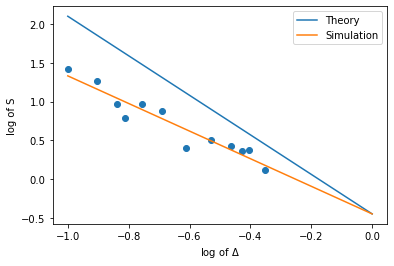

In [72]:
xp = np.linspace(-1, 0, 100)
ppp=xp*ii+ss
yyy=xp*(-2.554216)+ss
plt.plot(xp,yyy,label="Theory")
plt.plot(xp,ppp,label="Simulation")
plt.scatter(np.log10(x[0:17]),np.log10(m_total[0:17]))

plt.xlabel(r"log of $\Delta$")
plt.ylabel("log of S")
plt.legend(loc="upper right")
plt.show()

### To calculating $\nu_{||}$ , I use these formula:

$$ T \sim |\Delta|^{-\tau}$$

$$\tau = \nu_{||} - \beta'$$

T is mean survival time, and $\beta'$ is equal to $\beta$

In [2]:
from pylab import *
from scipy.ndimage import measurements
import numpy as np
import matplotlib.pyplot as plt
import copy
from tqdm import tqdm


pv = [0.2,0.3,0.35,0.4,0.44,0.47,0.49,0.544701,0.55701,0.574701,0.594701,0.62,0.63]#,0.724701,0.734701]#,0.67,0.7,0.8]for k in range(len(pv)):
t_total=[]

for k in range(len(pv)):
            print(k)
#             lattice=copy.copy(lattice_o)
            p = pv[k] 
            q=p*(2-p)
# rho_sim=[]
            L=3000
            num_sim=50
            
            all_prob=[]
            prob = np.zeros((L,1), dtype=int)
            for sim in tqdm(range(num_sim)):

                    lattice = np.zeros((L,L), dtype=int)
#                     lattice[0,0:L]=np.random.choice([0, 1], size=(L), p=[0,1])
                    lattice[0,int(L/2)] = 1


                    for j in range(1,L):
                            for i in range(L):
                                if ((i!=L-1) and (i!=0)):
                                    z=np.random.rand(1)[0]
                                    if lattice[j-1,i-1]==1 and lattice[j-1,i+1]==1 :
                                         if z<q:
                                                lattice[j,i]= 1
                                    elif lattice[j-1,i-1]!=lattice[j-1,i+1]:
                                         if z<p:
                                                lattice[j,i]= 1

                            if all([zeroch==0 for zeroch in lattice[j,:]])== False:
                                      prob[j,0] +=1

            prob=prob/num_sim
            sum_prob=sum(prob)
            
            
            t_total.append(sum_prob)
print(t_total)


0


100%|███████████████████████████████████████████| 50/50 [16:38<00:00, 19.97s/it]


1


100%|███████████████████████████████████████████| 50/50 [17:03<00:00, 20.48s/it]


2


100%|███████████████████████████████████████████| 50/50 [16:49<00:00, 20.19s/it]


3


100%|███████████████████████████████████████████| 50/50 [15:44<00:00, 18.88s/it]


4


100%|███████████████████████████████████████████| 50/50 [16:02<00:00, 19.24s/it]


5


100%|███████████████████████████████████████████| 50/50 [16:32<00:00, 19.84s/it]


6


100%|███████████████████████████████████████████| 50/50 [17:06<00:00, 20.53s/it]


7


100%|███████████████████████████████████████████| 50/50 [15:48<00:00, 18.96s/it]


8


100%|███████████████████████████████████████████| 50/50 [15:26<00:00, 18.53s/it]


9


100%|███████████████████████████████████████████| 50/50 [15:28<00:00, 18.58s/it]


10


100%|███████████████████████████████████████████| 50/50 [15:27<00:00, 18.54s/it]


11


100%|███████████████████████████████████████████| 50/50 [15:28<00:00, 18.57s/it]


12


100%|███████████████████████████████████████████| 50/50 [15:41<00:00, 18.82s/it]

[0.48000000000000004, 1.1600000000000001, 1.52, 2.0, 2.52, 2.9800000000000004, 4.46, 10.88, 11.120000000000001, 13.660000000000004, 31.24000000000001, 60.85999999999999, 119.83999999999999]


In [3]:
with open("t_total_survival_total.txt", 'w') as output:
    for row in t_total:
        output.write(str(row) + '\n')


In [50]:
with open("t_total_survival_total.txt", 'r') as file:
        t_total = [float(line.strip()) for line in file]

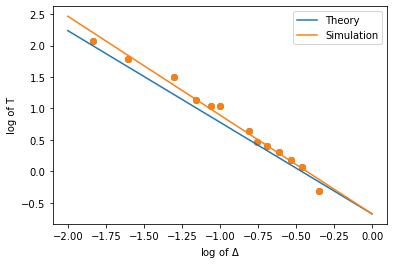

In [68]:
pv = [0.2,0.3,0.35,0.4,0.44,0.47,0.49,0.544701,0.55701,0.574701,0.594701,0.62,0.63]

x= [abs(ele-0.644701) for ele in pv]

plt.scatter(np.log10(x),np.log10(t_total))
x_1=np.array(np.log10(x))
y_1=np.array(np.log10(t_total))

ii,ss =np.polyfit(x_1,y_1,1)

xp = np.linspace(-2,0, 100)
ppp=xp*ii+ss
yyy=xp*(-1.457361)+ss


plt.plot(xp,yyy,label="Theory")
plt.plot(xp,ppp,label="Simulation")

plt.xlabel(r"log of $\Delta$")
plt.ylabel("log of T")
plt.legend(loc="upper right")

plt.scatter(np.log10(x),np.log10(t_total))
plt.show()



In [54]:
display(Latex(r'The $\tau$ is:'),-ii)

<IPython.core.display.Latex object>

1.571601175738263

$\tau = 1.571601175738263 $
$\Longrightarrow \nu_{||} = \tau + \beta = 1.571601175738263+ 0.25315823380272917 = 1.8247594095409922 $

### To find the last exponent , I used this formula:
$$ \xi_{\bot} \sim |p-p_{c}|^{-\nu_{\bot}}$$

and try to calculate the maximum length of a cluster between all times of runs 

In [41]:
from pylab import *
from IPython.display import display, Latex
from scipy.ndimage import measurements
import numpy as np
import matplotlib.pyplot as plt
import copy
from tqdm import tqdm

pv = [0.544701,0.55701,0.564701,0.574701,0.594701,0.614701,0.624701,0.634701]#,0.724701,0.734701]#,0.67,0.7,0.8]for k in range(len(pv)):
l_total=[]
for k in range(len(pv)):
            print(k)
#             lattice=copy.copy(lattice_o)
            p = pv[k] 
            q=p*(2-p)
# rho_sim=[]
            L=1500
            num_sim=25
            
            all_prob=[]
            prob = np.zeros((L,1), dtype=int)
            length_cl=[]
            for sim in tqdm(range(num_sim)):

                    lattice = np.zeros((L,L), dtype=int)
                    lattice[0,int(L/2)] = 1


                    for j in range(1,L):
                            for i in range(L):
                                if ((i!=L-1) and (i!=0)):
                                    z=np.random.rand(1)[0]
                                    if lattice[j-1,i-1]==1 and lattice[j-1,i+1]==1 :
                                         if z<q:
                                                lattice[j,i]= 1
                                    elif lattice[j-1,i-1]!=lattice[j-1,i+1]:
                                         if z<p:
                                                lattice[j,i]= 1

                    for ii in range(L):
                            if all([zeroth==0 for zeroth in lattice[:,ii]])==False:
                                 mmin=ii
                        
                                 break
                      
                    for iii in reversed(range(L)):
                            if all([zeroth==0 for zeroth in lattice[:,iii]])==False:
                                mmax =iii
                                break
#                     print(lattice)    
                    lengthi=mmax - mmin
                    length_cl.append(lengthi)
                    

            mean_len=mean(length_cl)
            
            
            l_total.append(mean_len)
print(l_total)


0


100%|███████████████████████████████████████████| 25/25 [02:06<00:00,  5.06s/it]


1


100%|███████████████████████████████████████████| 25/25 [02:15<00:00,  5.42s/it]


2


100%|███████████████████████████████████████████| 25/25 [02:11<00:00,  5.27s/it]


3


100%|███████████████████████████████████████████| 25/25 [02:07<00:00,  5.12s/it]


4


100%|███████████████████████████████████████████| 25/25 [02:06<00:00,  5.07s/it]


5


100%|███████████████████████████████████████████| 25/25 [02:09<00:00,  5.19s/it]


6


100%|███████████████████████████████████████████| 25/25 [02:01<00:00,  4.87s/it]


7


100%|███████████████████████████████████████████| 25/25 [02:03<00:00,  4.95s/it]

[4.8, 6.76, 7.36, 5.4, 10.56, 24.68, 38.84, 53.56]


In [45]:
with open("l_total_length.txt", 'w') as output:
    for row in l_total:
        output.write(str(row) + '\n')

In [59]:
with open("l_total_length.txt", 'r') as file:
        l_total = [float(line.strip()) for line in file]
l_total

[4.8, 6.76, 7.36, 5.4, 10.56, 24.68, 38.84, 53.56]

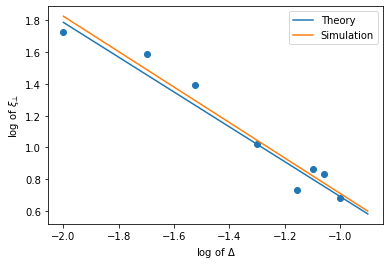

In [60]:
pv = [0.544701,0.55701,0.564701,0.574701,0.594701,0.614701,0.624701,0.634701]

x= [abs(ele-0.644701) for ele in pv]

x_1=np.array(np.log10(x))
y_1=np.array(np.log10(l_total))

ii,ss =np.polyfit(x_1,y_1,1)

xp = np.linspace(-2, -0.9, 100)
ppp=xp*ii+ss
yyy=xp*(-1.096854)+ss

plt.plot(xp,yyy,label="Theory")
plt.plot(xp,ppp,label="Simulation")

plt.xlabel(r"log of $\Delta$")
plt.ylabel(r"log of $\xi_{\bot}$")
plt.legend(loc="upper right")

plt.scatter(np.log10(x),np.log10(l_total))
plt.show()

In [61]:
display(Latex(r'The $\nu_{\bot}$ is:'),-ii)

<IPython.core.display.Latex object>

1.1162628519238929

### I also try to calculate $\nu_{||} $ by finding $\xi_{||}$ to use :
$$\xi_{||} \sim |p-p_{c}|^{\nu_{||}}$$
but I coulnd'd find a good aproximation for that , it is just close.

In [4]:
from pylab import *
from scipy.ndimage import measurements
import numpy as np
import matplotlib.pyplot as plt
import copy

pv = [0.54,0.544701,0.55, 0.554701,0.56, 0.564701,0.574701,0.584701]#,0.594701,0.604701,0.614701,0.624701,0.634701]#,0.724701,0.734701]#,0.67,0.7,0.8]for k in range(len(pv)):

#pv = [0.2,0.3,0.35,0.4,0.44,0.47,0.49,0.544701,0.55701,0.574701,0.594701,0.62,0.63]#,0.724701,0.734701]#,0.67,0.7,0.8]for k in range(len(pv)):
len_total=[]
length_j=[]
a=0
for k in range(len(pv)):
            print(k)
#             lattice=copy.copy(lattice_o)
            p = pv[k] 
            q=p*(2-p)
# rho_sim=[]
            L=3000
            num_sim=50
            
            all_prob=[]
            prob = np.zeros((L,1), dtype=int)
            for sim in tqdm(range(num_sim)):

                    lattice = np.zeros((L,L), dtype=int)
                    lattice[0,0:L]=np.random.choice([0, 1], size=(L), p=[0,1])



                    for j in range(1,L):
                            for i in range(L):
                                if ((i!=L-1) and (i!=0)):
                                    z=np.random.rand(1)[0]
                                    if lattice[j-1,i-1]==1 and lattice[j-1,i+1]==1 :
                                         if z<q:
                                                lattice[j,i]= 1
                                    elif lattice[j-1,i-1]!=lattice[j-1,i+1]:
                                         if z<p:
                                                lattice[j,i]= 1

                    for kk in range(L):
                            if kk!= L-1:
                                if all([zeroch==0 for zeroch in lattice[kk,:]])== True:
                                    length_j.append(kk) 
                                    break
                            else : length_j.append(kk)
                                
                            
                            

            mean_len=mean(length_j)
            length_j=[]
            
            
            len_total.append(mean_len)
print(len_total)

        

0


100%|███████████████████████████████████████████| 50/50 [13:42<00:00, 16.45s/it]


1


100%|███████████████████████████████████████████| 50/50 [13:46<00:00, 16.54s/it]


2


100%|███████████████████████████████████████████| 50/50 [13:45<00:00, 16.51s/it]


3


100%|███████████████████████████████████████████| 50/50 [13:42<00:00, 16.44s/it]


4


100%|███████████████████████████████████████████| 50/50 [13:45<00:00, 16.51s/it]


5


100%|███████████████████████████████████████████| 50/50 [13:51<00:00, 16.62s/it]


6


100%|███████████████████████████████████████████| 50/50 [13:49<00:00, 16.59s/it]


7


100%|███████████████████████████████████████████| 50/50 [13:48<00:00, 16.56s/it]

[105.38, 112.6, 120.28, 127.72, 147.72, 162.5, 196.84, 252.32]


In [5]:
with open("len_total_length.txt", 'w') as output:
    for row in len_total:
        output.write(str(row) + '\n')

In [62]:
with open("len_total_length.txt", 'r') as file:
        len_total = [float(line.strip()) for line in file]

In [63]:
pv = [0.54,0.544701,0.55, 0.554701,0.56, 0.564701,0.574701,0.584701]
x= [abs(ele-0.644701) for ele in pv]

x_1=np.array(np.log10(x))
y_1=np.array(np.log10(len_total))

ii,ss =np.polyfit(x_1,y_1,1)


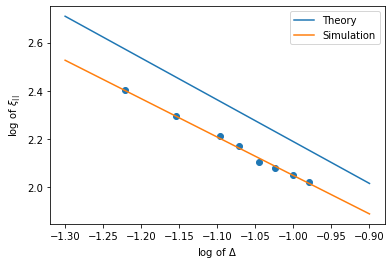

In [64]:
xp = np.linspace(-1.3, -0.9, 100)
ppp=xp*ii+ss
yyy=xp*(-1.733847)+ss

plt.plot(xp,yyy,label="Theory")
plt.plot(xp,ppp,label="Simulation")

plt.xlabel(r"log of $\Delta$")
plt.ylabel(r"log of $\xi_{||}$")
plt.legend(loc="upper right")

plt.scatter(np.log10(x),np.log10(len_total))
plt.show()

In [65]:
display(Latex(r'The $\nu_{||}$ is:'),-ii)

<IPython.core.display.Latex object>

1.5934514731176506